# Exploration and cleaning of the data

Let's load functions, librarys, modules and datasets for the cleaning of the data.

In [1]:
import sys
sys.path.append(r"C:\Users\lenovo\Desktop\My_first_project\My_project\src")
from cleaning_functions import*

In [2]:
import numpy as np
import pandas as pd
import re
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
GSAF = r"C:\Users\lenovo\Desktop\My_first_project\My_project\input\attacks.csv"

df = pd.read_csv(GSAF, encoding = "ISO-8859-1")

## Cleaning

In [4]:
df.drop("Unnamed: 22", inplace = True, axis=1) #deleting unnamed 22
df.drop("Unnamed: 23", inplace = True, axis=1)
df.drop("Case Number.2", inplace = True, axis=1)# deleting case number 2, duplicated
df.drop("href formula", inplace = True, axis=1) #deleting href formula, duplicated

In [5]:
df.dropna(axis=0, inplace= True, how='all') ## #i delete all rows which are only Nan

## Variable: Year.

I want to have all the information in numerical form for better management.

In [6]:
new_Date = df["Year"].astype(str)

new_Date = new_Date.str.replace("-", "/")
new_Date = new_Date.str.replace(" ", "/")
new_Date = new_Date.str.replace("Jan", "01")
new_Date = new_Date.str.replace("Feb", "02")
new_Date = new_Date.str.replace("Mar", "03")
new_Date = new_Date.str.replace("Apr", "04")
new_Date = new_Date.str.replace("May", "05")
new_Date = new_Date.str.replace("Jun", "06")
new_Date = new_Date.str.replace("Jul", "07")
new_Date = new_Date.str.replace("Aug", "08")
new_Date = new_Date.str.replace("Sep", "09")
new_Date = new_Date.str.replace("Oct", "10")
new_Date = new_Date.str.replace("Nov", "11")
new_Date = new_Date.str.replace("Dec", "12")
df["Date"] = new_Date


<bound method Axes.scatter of <AxesSubplot:>>

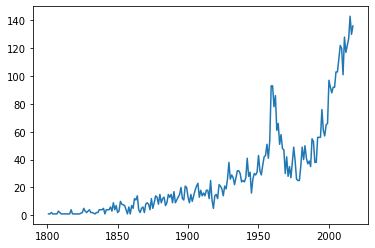

In [7]:
df["Year_1900"] = df[df['Year']>1800]['Year']  ## i only want Years after 1900 becouse before just makes the graphs messy.
##i dont find them relevant
df["Year_1900"] = df[df["Year_1900"]<2018]["Year_1900"]
 
df["Year_1900"].value_counts().sort_index().plot().scatter

### Variable: Gender.

I used the function to only get "M" or "F" in my Gender column.

In [8]:
df["Sex "]= df["Sex "].apply(gender_cleaning)
df["Sex "].value_counts()

Man      5096
Woman     637
Name: Sex , dtype: int64

### Variable: Age.

I used the function to remove all values who cant be integers. There are only integers left, ranging from 5 to 90. 

In [9]:
df["Age"] = df["Age"].apply(age_cleaning)

### Variable: Date.

Whit the Date variable, i get the variable of the columns "Href", which has a cleaner data than the "Date" column itself.
Then, i convert it to a datetime object, using pd.to_datetime

In [10]:
get_date = "\d{4}\.\d{2}\.\d{2}" #here i get the dates of href, whcih are at the end and its more clean data

df["New_dates"] = df["href"].apply(lambda x: re.findall(get_date, str(x))).explode()
df["New_dates"] = df["New_dates"].apply(autoconvert_format)

In [11]:
df["New_dates"] = df["New_dates"].apply(autoconvert_format) ## here i apply the function to convert to datetime object, or
## return nan

In [12]:
df["Final_dates"] = pd.to_datetime(df["New_dates"], errors="coerce") ## i do it again for if the flies.

Now, when i have the datetime object, i can convert it easly to days and months using functions:

In [13]:
df["Day_of_week"] = df["Final_dates"].dt.day_name() #i create column for the day and the month the attack happened
df["Month"] = df["Final_dates"].dt.month_name()

In [14]:
date_filter = (df["Final_dates"] <= "2020") & (df["Final_dates"] > "1900")
df = df.loc[date_filter] ##finally i just want dates before 2020 and after 1900.

## Variable: Activities.

I want to organize all diferent data only into 9 different variables.

In [15]:
df["Activity"] = df["Activity"].apply(activites_cleaning)

In [16]:
df["Activity"].value_counts().head(10)

Surf                      1256
Swimming                  1047
Fishing                    876
Diving                     532
Boating                    238
Walking near the water     194
Standing                   106
Sea catastrophe             22
SHARKNADO??                  1
Name: Activity, dtype: int64

### Variable: Type.

I clean the type of attack and organize it only into "Provoked attack" or "Unprovoked attack".

In [17]:
df["Type"] = df["Type"].apply(type_cleaning)

### Variable: Fatality.

Clean the variable and organize it only into "Barely alive" or "Fatal attack".

In [18]:
df["Fatal (Y/N)"] = df["Fatal (Y/N)"].apply(fatality_clean)

In [19]:
df["Fatal (Y/N)"].value_counts()

Barely alive    4095
Fatal attack     868
Name: Fatal (Y/N), dtype: int64

### Variable: Species.

I want to organize all diferent data of the species column only into 11 different variables.

In [20]:
df["Species "] = df["Species "].apply(shark_species)

### Variable: Country.

I want to organize all diferent data of the countries column only into 14 different variables.

In [21]:
df["Country"] = df["Country"].apply(country_cleaning)

### Export.

Export the clean data frame to a new CSV file

In [22]:
df.to_csv("src/clean_sharks.csv",index=False)